https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html

In [24]:
# Importing the libraries
import cv2
import matplotlib.pyplot as plt
sift = cv2.SIFT_create()

In [8]:
# Reading the image and converting into B/W
image1 = cv2.imread('./bildverband1/IMG_20221021_121639_802.jpg')
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
kp1, des1 = sift.detectAndCompute(gray_image1, None)

In [9]:

image2 = cv2.imread('./bildverband1/IMG_20221021_121649_588.jpg')
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
kp2, des2 = sift.detectAndCompute(gray_image2, None)

In [10]:
# Applying the function
kp_image = cv2.drawKeypoints(image1, kp1, None, color=(
	0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow('SIFT', kp_image)
cv2.waitKey()

113

In [11]:
cv2.destroyAllWindows()

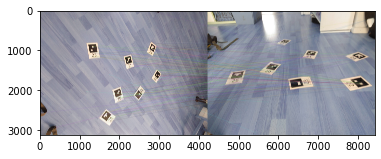

(<matplotlib.image.AxesImage at 0x7f7faff79ea0>, None)

In [23]:
brute_force = cv2.BFMatcher()
matches = brute_force.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(image1,kp1,image2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

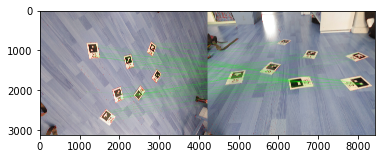

(<matplotlib.image.AxesImage at 0x7f7fae554880>, None)

In [19]:

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)
img3 = cv2.drawMatchesKnn(image1,kp1,image2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()